<a href="https://colab.research.google.com/github/hphp777/GAN/blob/master/Basic/Auto_Encoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 오토인코더
: 단순히 입력을 출력으로 복사하는 신경망으로 은닉층의 노드 개수가 입력값보다 적은 것이 특징. 입력과 출력이 동일한 이미지
- 구성: 인코더, 병목층, 디코더(압축된 데이터를 원래대로 재구성. 입력에 가까운 출력을 생성), 손실 재구성(손실함수는 입력과 출력의 차이를 가지고 계산)
- 활용: 데이터 압축(이미지나 음성), 차원의 저주 문제 예방, 특성 추출(비지도 학습)
- 생성된 이미지가 다소 흐릿하기 때문에 변형 오토인코더 사용

In [17]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [18]:
input_image = tf.keras.layers.Input(shape=(784, ))
encoded_input = tf.keras.layers.Dense(32,activation='relu')(input_image)
decoded_output = tf.keras.layers.Dense(784, activation='sigmoid')(encoded_input)
autoencoder = tf.keras.models.Model(input_image, decoded_output)

In [24]:
autoencoder.compile(optimizer='adam', loss = 'binary_crossentropy')

In [22]:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     # 데이터셋 준비
(X_train, _), (X_test, _) = tf.keras.datasets.mnist.load_data() # (image, label) 형태로 데이터를 불러옴
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

# np.pord : 행렬 요소를 다 곱함
X_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))
X_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))

In [25]:
autoencoder.fit(
    X_train,
    X_train,
    epochs=30,
    batch_size=256,
    shuffle=True,
    validation_data=(X_test,X_test)
)

Epoch 1/30
235/235 [==============================] - 4s 14ms/step - loss: 0.2771 - val_loss: 0.1896
Epoch 2/30
235/235 [==============================] - 3s 13ms/step - loss: 0.1710 - val_loss: 0.1545
Epoch 3/30
235/235 [==============================] - 3s 13ms/step - loss: 0.1453 - val_loss: 0.1347
Epoch 4/30
235/235 [==============================] - 3s 12ms/step - loss: 0.1293 - val_loss: 0.1221
Epoch 5/30
235/235 [==============================] - 3s 13ms/step - loss: 0.1186 - val_loss: 0.1132
Epoch 6/30
235/235 [==============================] - 3s 13ms/step - loss: 0.1112 - val_loss: 0.1071
Epoch 7/30
235/235 [==============================] - 3s 12ms/step - loss: 0.1058 - val_loss: 0.1025
Epoch 8/30
235/235 [==============================] - 3s 12ms/step - loss: 0.1020 - val_loss: 0.0992
Epoch 9/30
235/235 [==============================] - 3s 13ms/step - loss: 0.0993 - val_loss: 0.0970
Epoch 10/30
235/235 [==============================] - 3s 13ms/step - loss: 0.0974 - val_lo

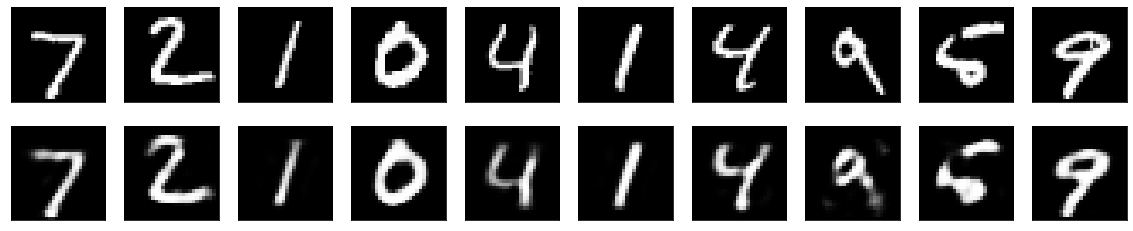

In [27]:
# 원래 입력과 재구성된 입력을 시각화
reconstructed_img = autoencoder.predict(X_test)
n = 10
plt.figure(figsize=(20,4)) # 20x4의 figure

for i in range(n):
  
  ax = plt.subplot(2, n, i+1) # (row, column, index) 
  plt.imshow(X_test[i].reshape(28,28))
  plt.gray()

  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  ax = plt.subplot(2, n, i+1+n) # (row, column, index) 
  plt.imshow(reconstructed_img[i].reshape(28,28))
  plt.gray()

  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

plt.show()